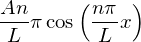

In [7]:
#Differentiation
import math
import numpy as np
from sympy import init_printing, Symbol, sin, cos, diff
init_printing()
x = Symbol('x')
A = Symbol('A')
n = Symbol('n')
L = Symbol('L')
pi = Symbol('pi')
psi = A*sin(n*pi*x/L)
f = diff(psi,x)
f

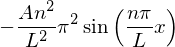

In [3]:
g = diff(f, x)
g

In [2]:
#Integration
from sympy import init_printing, integrate, Symbol, exp, cos
init_printing()
x = Symbol('x')
A = Symbol('A')
n = Symbol('n')
L = Symbol('L')
pi = Symbol('pi')
#Polynomial function
f1 = x**2 + x + 1
f1

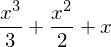

In [3]:
integrate(f1,x)

In [4]:
#Exponential function
f2 = x**2*exp(x)*cos(x)
f2

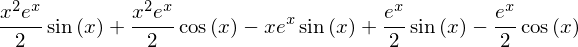

In [5]:
#May require more computational time.
g2 = integrate(f2, x)
g2

In [10]:
#Particle in a box
from pylab import *
from sympy import *
import math
import numpy as np
import matplotlib.pyplot as plt
#Defining necessary constants
hbar = 1.05457148e-34 #Planck's constant (modified); units: m^2 * kg * s^-1 
m_e = 9.10938188e-31 #mass of electron; units: kg
c = 299792458. #speed of light; units: m/s
ch_e = 1.602e-19 #charge of electron; units: C
L = 30. #length of well in angstroms
x = linspace(0., L) #array of position values
delL = .25 #length of well divisor
V = 1.5 #potential height of well
Ldiff1 = (L-delL)/2. #start of potential barrier
Ldiff2 = (L+delL)/2. #end of potential barrier
z = Symbol('z')
K = hbar**2 / (2.*ch_e*m_e*(1e-20)) # Coefficient of Hamiltonian gradient

p = 10 #perturbation order
 
H = np.zeros(shape = (p,p))
for i in range(1, p+1):
    psi_i = sqrt(2./L)*sin(i*math.pi*z/L)
    
    for j in range(1,p+1):
        psi_j = sqrt(2/L)*sin(j*math.pi*z/L)
        psi_j_1 = diff(psi_j) #first derivative
        psi_j_2 = diff(psi_j_1) #second derivative
        H[i-1][j-1] = -K*integrate(psi_i*psi_j_2, (z, 0, L)) + V*integrate(psi_i*psi_j, (z, Ldiff1, Ldiff2))        
eigenvalues, eigenvectors = linalg.eig(H)
E = np.sort(eigenvalues)
print "Hamiltonian:", H
print "Eigenvectors:", eigenvectors, "\n Eigenenergies", E
print "Energy levels with respect to E1", E/E[0]

Hamiltonian: [[ 6.67842897e-02  0.00000000e+00 -2.49928614e-02 -1.15859708e-16
   2.49814421e-02  0.00000000e+00 -2.49643191e-02 -4.16333634e-17
   2.49414994e-02  2.11172425e-17]
 [ 0.00000000e+00  1.67148581e-01 -8.32667268e-17 -1.14192392e-05
   1.22917767e-16  1.71229891e-05 -5.20417043e-18 -2.28196987e-05
   5.20417043e-18  2.85070266e-05]
 [-2.49928614e-02 -8.32667268e-17  4.01058610e-01  2.34834063e-32
  -2.49757384e-02 -3.52251094e-32  2.49586224e-02  2.08166817e-17
  -2.49358121e-02  2.90747882e-16]
 [-4.62725100e-17 -1.14192392e-05  5.87085157e-33  6.68594314e-01
  -6.97366567e-16 -3.42389379e-05  0.00000000e+00  4.56300157e-05
  -5.17664798e-16 -5.70023346e-05]
 [ 2.49814421e-02  2.84098490e-17 -2.49757384e-02 -4.16338581e-16
   1.06960727e+00 -1.01116265e-15 -2.49472313e-02 -6.61993029e-16
   2.49244398e-02  4.16333634e-17]
 [ 0.00000000e+00  1.71229891e-05 -8.80627736e-33 -3.42389379e-05
  -7.27638894e-16  1.50433717e+00 -9.39336251e-32 -6.84215738e-05
   2.08166817e-17  8

In [11]:
#Initialize matrix of all the potential wave functions
psi = np.zeros(shape = (p,size(x)))

for n in range(1,p+1):
    for i in range(size(x)):
        xi = x[i]
        for j in range(p): psi[j][i] += eigenvectors[n-1][j]*sqrt(2./L)*sin(n*pi*xi/L)
            
psi = psi[np.argsort(eigenvalues)] #Ensures that the eigenfunctions (wave functions) are ordered by energy level

In [12]:
print psi

[[ 0.         -0.018473   -0.03699226 -0.05554071 -0.0739986  -0.09214323
  -0.10968908 -0.12635458 -0.14193158 -0.15633167 -0.16959078 -0.18182792
  -0.19317027 -0.20367016 -0.2132446  -0.22166233 -0.22858967 -0.2336867
  -0.23672797 -0.23771119 -0.23691775 -0.2349008  -0.23239684 -0.23017903
  -0.22888864 -0.22888864 -0.23017903 -0.23239684 -0.2349008  -0.23691775
  -0.23771119 -0.23672797 -0.2336867  -0.22858967 -0.22166233 -0.2132446
  -0.20367016 -0.19317027 -0.18182792 -0.16959078 -0.15633167 -0.14193158
  -0.12635458 -0.10968908 -0.09214323 -0.0739986  -0.05554071 -0.03699226
  -0.018473    0.        ]
 [ 0.          0.03301805  0.06549417  0.09689522  0.12670553  0.15443541
   0.17962923  0.20187309  0.22080166  0.23610428  0.24752994  0.25489134
   0.25806779  0.25700708  0.25172638  0.24231199  0.22891812  0.21176456
   0.19113315  0.16736317  0.14084566  0.11201675  0.08135028  0.0493498
   0.0165403  -0.0165403  -0.0493498  -0.08135028 -0.11201675 -0.14084566
  -0.16736317 

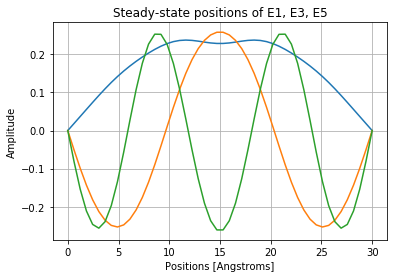

[ 0.1486084   0.59443359  1.33747557  2.37773435  3.71520993  5.3499023
  7.28181146  9.51093742 12.03728017 14.86083971]
Deviation ratio calculated/expected: [2.32218464 3.55631851 3.33334425 3.55631856 3.47143774 3.55631864
 3.51224683 3.55631874 3.52928362 3.55631888]


In [19]:
#Plot the steady-state particle distributions of the first two energy states
from ipykernel import kernelapp as app
for i in range(3):
    plt.plot(x, -psi[2*i])

E_exp = np.zeros(p)
for n in range(p):
    E_exp[n] = 2.22e19*((1+n)*hbar*pi/(L*1e-10))**2/(2.*m_e)
    
plt.title('Steady-state positions of E1, E3, E5')
plt.xlabel('Positions [Angstroms]')
plt.ylabel('Amplitude')
plt.show()
plt.grid()
    
print E_exp
print "Deviation ratio calculated/expected:", E_exp/E

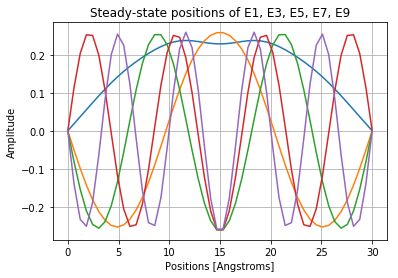

[ 0.1486084   0.59443359  1.33747557  2.37773435  3.71520993  5.3499023
  7.28181146  9.51093742 12.03728017 14.86083971]
Deviation ratio calculated/expected: [2.32218464 3.55631851 3.33334425 3.55631856 3.47143774 3.55631864
 3.51224683 3.55631874 3.52928362 3.55631888]


In [14]:
from ipykernel import kernelapp as app
for i in range(5):
    plt.plot(x, -psi[2*i])

E_exp = np.zeros(p)
for n in range(p):
    E_exp[n] = 2.22e19*((1+n)*hbar*pi/(L*1e-10))**2/(2.*m_e)
    
plt.title('Steady-state positions of E1, E3, E5, E7, E9')
plt.xlabel('Positions [Angstroms]')
plt.ylabel('Amplitude')
plt.show()
plt.grid()
    
print E_exp
print "Deviation ratio calculated/expected:", E_exp/E

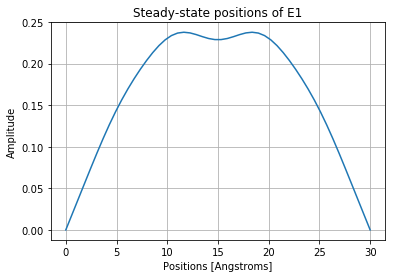

[ 0.1486084   0.59443359  1.33747557  2.37773435  3.71520993  5.3499023
  7.28181146  9.51093742 12.03728017 14.86083971]
Deviation ratio calculated/expected: [2.32218464 3.55631851 3.33334425 3.55631856 3.47143774 3.55631864
 3.51224683 3.55631874 3.52928362 3.55631888]


In [16]:
#Ground state wavefunction
from ipykernel import kernelapp as app
for i in range(1):
    plt.plot(x, -psi[2*i])

E_exp = np.zeros(p)
for n in range(p):
    E_exp[n] = 2.22e19*((1+n)*hbar*pi/(L*1e-10))**2/(2.*m_e)
    
plt.title('Steady-state positions of E1')
plt.xlabel('Positions [Angstroms]')
plt.ylabel('Amplitude')
plt.show()
plt.grid()
    
print E_exp
print "Deviation ratio calculated/expected:", E_exp/E

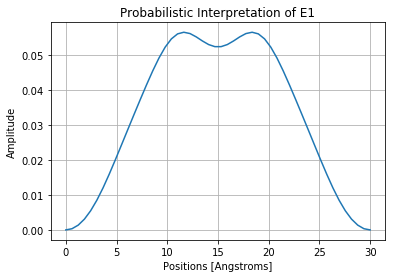

[ 0.1486084   0.59443359  1.33747557  2.37773435  3.71520993  5.3499023
  7.28181146  9.51093742 12.03728017 14.86083971]
Deviation ratio calculated/expected: [2.32218464 3.55631851 3.33334425 3.55631856 3.47143774 3.55631864
 3.51224683 3.55631874 3.52928362 3.55631888]


In [23]:
#Probability representation
from ipykernel import kernelapp as app
for i in range(1):
    plt.plot(x, (-psi[2*i])**2)

E_exp = np.zeros(p)
for n in range(p):
    E_exp[n] = 2.22e19*((1+n)*hbar*pi/(L*1e-10))**2/(2.*m_e)
    
plt.title('Probabilistic Interpretation of E1')
plt.xlabel('Positions [Angstroms]')
plt.ylabel('Amplitude')
plt.show()
plt.grid()
    
print E_exp
print "Deviation ratio calculated/expected:", E_exp/E